In [1]:
import control
from math import sqrt

In [2]:
f=control.tf([1,1],[1,1,1])
print(f)


   s + 1
-----------
s^2 + s + 1



funkcija control.tf kreira funkciju prenosa sistema u S domenu, sadrzi 2 parametra, koeficijente polinoma brojioca i imenioca 

In [3]:
z=control.c2d(f,1)
print(z)


   0.8738 z - 0.2918
-----------------------
z^2 - 0.7859 z + 0.3679

dt = 1



Funkcija vraca funkciju prenosa u Z domenu, pretvara u diskretan (discrete-time) sistem

(array([0.39294656+0.46203078j, 0.39294656-0.46203078j]), array([0.33396471]))

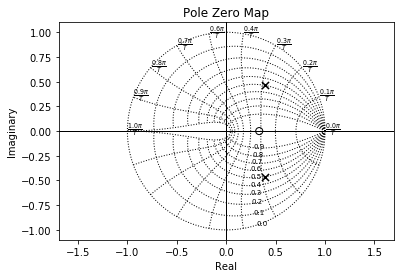

In [4]:
control.pzmap(z, True, 'PZmap')

control.pzmap funkcija plotuje mapu polova i nula, parametri su funkcija za koju trazimo polozaj nula i polova, bool vrednost 'True'- ako je True grafikon je generisan pomocu Matplotlib-a, u suprotnom se polovi i nule samo izracunavaju i vracaju

In [5]:
a=control.pole(z)
print(a)
b=control.zero(z)
print(b)  

[0.39294656+0.46203078j 0.39294656-0.46203078j]
[0.33396471]


control.pole i control.zero vracaju niz polova i nula sistema

In [6]:
counter=0

for i in a :
    if(sqrt(i.real**2 + i.imag**2))<1: 
        counter += 1
if len(a) == counter:
    print("Sistem je stabilan")
else:
    print("Sistem je nestabilan")

Sistem je stabilan


-Ovde proveravamo stabilnost sistema. 
Za svaki pol ispitujemo da li je moduo manji od 1, ako jeste povecavamo counter. Prolazi se kroz svaki pol i uvecava se counter kada je to potrebno. 
Funkcija len na kraju pokazuje broj polova i ako je striktno jednaka counteru onda je sistem stabilan (konvergira). 
Ukoliko bi postojao samo jedan pol ciji moduo nije manji od 1, counter bi bio bar za 1 manji od len(a) i onda sistem ne bi bio stabilan.